<a href="https://colab.research.google.com/github/AbdulHamidDabboussi/SVM-Logistic_Regression-PCA/blob/master/SVM_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')
!ls /gdrive/My\ Drive/Bilkent/Year\ 3/CS464

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
q1_dataset.mat	q2_gag_sequence.txt  q2_train_set.txt
q2_dataset.mat	q2_test_set.txt


Import Libraries

In [0]:
import os
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics

Load data files

In [0]:
root = '/gdrive/My Drive/Bilkent/Year 3/CS464'
q1_data = os.path.join(root, 'q1_dataset.mat')
q2_data = os.path.join(root, 'q2_dataset.mat')
data = spio.loadmat(q1_data)
image_tensor = spio.loadmat(q2_data)

In [0]:
hog_features_test = np.array(data['hog_features_test'])
hog_features_train = np.array(data['hog_features_train'])
inception_features_test = np.array(data['inception_features_test'])
inception_features_train = np.array(data['inception_features_train'])
subclass_labels_test = np.array(data['subclass_labels_test'])
subclass_labels_train = np.array(data['subclass_labels_train'])
superclass_labels_test = np.array(data['superclass_labels_test'])
superclass_labels_train = np.array(data['superclass_labels_train'])
image = image_tensor['data']
image_matrix = image.reshape((150, 10625))

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def fit(X, y, batch_size = 25, learning_rate = 0.01, iterations = 1000):
    m, n = np.shape(X)
    # weights initialization is gaussian distributed
    weights = np.random.normal(0, 0.01, (n, 1))
    data = np.hstack((X, y)) 
    
    for i in range(iterations):

        if batch_size == m and i % 100 == 0:
            #print(np.ndarray.flatten(weights))
            print(np.argsort(np.ndarray.flatten(weights))[:-10:-1])
            

        np.random.shuffle(data) 
        batches = [data[k:k+batch_size] for k in range (0, m, batch_size)]
        for batch in batches:
            X_batch = batch[: , :-1]
            y_batch = batch[:, -1].reshape((-1, 1)) 
            z = np.dot(X_batch, weights)
            h = sigmoid(z)
            error = y_batch - h
            weights += learning_rate * np.dot(X_batch.T, error)
            

    return weights

In [0]:
def metric(y_label, y_pred):
    test_labels = y_label
    y_pred = y_pred

    correct = 0
    TN = 0
    TP = 0
    FN = 0
    FP = 0
    for g_y, p_y in zip(test_labels, y_pred):
        if g_y == p_y: 
            correct += 1
        if p_y == 0 and g_y == 0:
            TN += 1
        if p_y == 0 and g_y == 1:
            FN += 1
        if p_y == 1 and g_y == 0:
            FP += 1
        if p_y == 1 and g_y == 1:
            TP += 1

    accuracy = np.around((correct/float(len(y_pred))*100), decimals = 2)
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    NPV = TN/(TN + FN)
    FPR = FP/(FP + TN)
    FDR = FP/(FP + TP)
    F1 = 2 * (precision * recall) / (precision + recall)
    F2 = 5 * (precision * recall) / (4*precision + recall)

    print("TP = " + str(TP) + "   FP = " + str(FP))
    print("FN = " + str(FN) + "    TN = " + str(TN))

    print("Accuracy = " + str(accuracy) + "%")
    print("Precision = " + str(precision))
    print("Recall = " + str(recall))
    print("NPV = " + str(NPV))
    print("FPR = " + str(FPR))
    print("FDR = " + str(FDR))
    print("F1-score = " + str(F1))
    print("F2-score = " + str(F2))


def test(test_features, test_labels, weights):     
    y_pred = np.around(sigmoid(np.dot(test_features, weights)))
    metric(test_labels, y_pred)


In [0]:
#HOG part
print("HOG Stochastic\n")
%time w = fit(hog_features_train, superclass_labels_train, 1, 0.1)
test(hog_features_test, superclass_labels_test, w)

print("\nHOG Mini Batch\n")
%time w = fit(hog_features_train, superclass_labels_train, 25, 0.1)
test(hog_features_test, superclass_labels_test, w)

print("\nHOG Batch\n")
%time w = fit(hog_features_train, superclass_labels_train, hog_features_train.shape[0], 0.1)
test(hog_features_test, superclass_labels_test, w)

#Neural network part
print("\nInception Stochastic\n")
%time w = fit(inception_features_train, superclass_labels_train, 1, 0.1)
test(inception_features_test, superclass_labels_test, w)

print("\nInception Mini Batch\n")
%time w = fit(inception_features_train, superclass_labels_train, 25, 0.1)
test(inception_features_test, superclass_labels_test, w)

print("\nInception Batch\n")
%time w = fit(inception_features_train, superclass_labels_train, inception_features_train.shape[0], 0.1)
test(inception_features_test, superclass_labels_test, w)

HOG Stochastic

CPU times: user 33.4 s, sys: 18.6 ms, total: 33.4 s
Wall time: 33.4 s
TP = 121   FP = 71
FN = 79    TN = 129
Accuracy = 62.5%
Precision = 0.6302083333333334
Recall = 0.605
NPV = 0.6201923076923077
FPR = 0.355
FDR = 0.3697916666666667
F1-score = 0.6173469387755102
F2-score = 0.6098790322580645

HOG Mini Batch

CPU times: user 9.83 s, sys: 108 ms, total: 9.94 s
Wall time: 9.83 s
TP = 123   FP = 76
FN = 77    TN = 124
Accuracy = 61.75%
Precision = 0.6180904522613065
Recall = 0.615
NPV = 0.6169154228855721
FPR = 0.38
FDR = 0.38190954773869346
F1-score = 0.6165413533834587
F2-score = 0.6156156156156156

HOG Batch

[284 260 231 276 241  95 235 201 120]
[154 155 290 289  29 153   9 288 164]
[154 155 290  29 289 225 315   9 317]
[315 317 225 154  29 155 290   9 289]
[315 317 225  29   9 216 155 290 154]
[315 317 225 216   9  29 290 155  81]
[315 216 317 225   9  29  81 263 290]
[315 216 317 225   9  29  81 263 290]
[315 216 317 225   9 263  29  81 290]
[315 216 225 317   9 263 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[ 193 1545 1701 1058  123  993 1615  119 1445]
[ 123 1545 1701 1108  193  993 1928 1783 1950]
[ 123 1701 1108 1545 1928  193  993 1950 1783]
[ 123 1108 1928  993 1701 1783 1545 1950 1189]
[ 123 1108 1928  993 1783 1189 1701 1950 1948]
[ 123 1928 1108  993 1783 1189 1948 1950  274]
[ 123  993 1108 1928 1783 1189 1020 1948  274]
[ 123  993 1108 1928 1783 1948 1189 1020  187]
[ 123  993 1783 1108 1948 1189 1928 1020  187]
CPU times: user 1min 37s, sys: 1min 2s, total: 2min 40s
Wall time: 1min 21s
TP = 175   FP = 20
FN = 25    TN = 180
Accuracy = 88.75%
Precision = 0.8974358974358975
Recall = 0.875
NPV = 0.8780487804878049
FPR = 0.1
FDR = 0.10256410256410256
F1-score = 0.8860759493670887
F2-score = 0.8793969849246231


In [0]:
def stratified_k_fold(features, labels, k):
    data = np.hstack((features, labels))
    np.random.shuffle(data)
    folds = np.array_split(data, k)

    return folds

In [0]:
folds_hog = stratified_k_fold(hog_features_train, superclass_labels_train, 5)
folds_inception = stratified_k_fold(inception_features_train, superclass_labels_train, 5)

In [0]:
def k_fold_validation(model, folds):
    accuracy = []
    for i in range(0, 5):
        if i == 0:
            data = np.vstack((folds[1:]))
        elif i == 4:
            data = np.vstack((folds[:-1]))
        else:
            print
            data1 = np.vstack((folds[:i]))
            data2 = np.vstack((folds[i+1:]))
            data = np.vstack((data1, data2))
        model.fit(data[:,:-1], data[:,-1])
        accuracy.append(model.score(folds[i][:,:-1], folds[i][:,-1]))
    print("Mean accuracy = " +str(np.mean(accuracy)))

In [0]:
C = [0.01, 0.1, 1, 10, 100]
print("HOG")
for c in C:
    print("For c = " + str(c))
    model = svm.SVC(C=c, kernel='linear')
    k_fold_validation(model, folds_hog)
    print('\n')

print("\nInception")
for c in C:
    print("For c = " + str(c))
    model = svm.SVC(C=c, kernel='linear')
    k_fold_validation(model, folds_inception)
    print('\n')

HOG
For c = 0.01


KeyboardInterrupt: ignored

In [0]:
model = svm.SVC(C=1, kernel='linear')
%time model.fit(hog_features_train, superclass_labels_train)
y_pred = model.predict(hog_features_test)
print("\nFor optimal C =  1 in HOG")
metric(superclass_labels_test, y_pred)

model = svm.SVC(C=1, kernel='linear')
%time model.fit(inception_features_train, superclass_labels_train)
y_pred = model.predict(inception_features_test)
print("\nFor optimal C = 0.01 in inception")
metric(superclass_labels_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For optimal C =  1 in HOG
TP = 126   FP = 60
FN = 74    TN = 140
Accuracy = 66.5%
Precision = 0.6774193548387096
Recall = 0.63
NPV = 0.6542056074766355
FPR = 0.3
FDR = 0.3225806451612903
F1-score = 0.6528497409326425
F2-score = 0.6389452332657202


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



For optimal C = 0.01 in inception
TP = 172   FP = 28
FN = 28    TN = 172
Accuracy = 86.0%
Precision = 0.86
Recall = 0.86
NPV = 0.86
FPR = 0.14
FDR = 0.14
F1-score = 0.8599999999999999
F2-score = 0.8599999999999999


In [0]:
gamma = [2**(-4), 2**(-3), 2**(-2), 2**(-1), 1, 2, 2**(6)]
print("HOG")
for g in gamma:
    print("For gamma = " + str(g))
    model = svm.SVC(C=1000000, kernel='rbf', gamma=g)
    k_fold_validation(model, folds_hog)
    print('\n')

print("\nInception")
for g in gamma:
    print("For gamma = " + str(g))
    model = svm.SVC(C=1000000, kernel='rbf', gamma=g)
    k_fold_validation(model, folds_inception)
    print('\n')

HOG
For gamma = 0.0625
Mean accuracy = 0.6855


For gamma = 0.125
Mean accuracy = 0.687


For gamma = 0.25
Mean accuracy = 0.6895


For gamma = 0.5
Mean accuracy = 0.6950000000000001


For gamma = 1
Mean accuracy = 0.706


For gamma = 2
Mean accuracy = 0.6945


For gamma = 64
Mean accuracy = 0.476



Inception
For gamma = 0.0625
Mean accuracy = 0.5


For gamma = 0.125
Mean accuracy = 0.475


For gamma = 0.25
Mean accuracy = 0.472


For gamma = 0.5
Mean accuracy = 0.472


For gamma = 1
Mean accuracy = 0.472


For gamma = 2
Mean accuracy = 0.472


For gamma = 64
Mean accuracy = 0.472




In [0]:
model = svm.SVC(C=1000000, kernel='rbf', gamma=1)
%time model.fit(hog_features_train, superclass_labels_train)
y_pred = model.predict(hog_features_test)
print("\nFor optimal gamma = 1 in HOG")
metric(superclass_labels_test, y_pred)

model = svm.SVC(C=1000000, kernel='rbf', gamma=0.0625)
%time model.fit(inception_features_train, superclass_labels_train)
y_pred = model.predict(inception_features_test)
print("\nFor optimal gamma = 0.0625 in inception")
metric(superclass_labels_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 2.14 s, sys: 2 ms, total: 2.14 s
Wall time: 2.15 s

For optimal gamma = 1 in HOG
TP = 146   FP = 57
FN = 54    TN = 143
Accuracy = 72.25%
Precision = 0.7192118226600985
Recall = 0.73
NPV = 0.7258883248730964
FPR = 0.285
FDR = 0.28078817733990147
F1-score = 0.7245657568238213
F2-score = 0.727816550348953


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 13.6 s, sys: 0 ns, total: 13.6 s
Wall time: 13.6 s

For optimal gamma = 0.0625 in inception
TP = 200   FP = 165
FN = 0    TN = 35
Accuracy = 58.75%
Precision = 0.547945205479452
Recall = 1.0
NPV = 1.0
FPR = 0.825
FDR = 0.4520547945205479
F1-score = 0.7079646017699115
F2-score = 0.8583690987124464


In [0]:
gamma = [2**(-2), 2, 2**(6)]
C = [10**(-2), 1, 10**2]
print("HOG")
for g in gamma:
    for c in C:
        print("For gamma = " + str(g) + " and c = " + str(c))
        model = svm.SVC(C=c, kernel='rbf', gamma=g)
        k_fold_validation(model, folds_hog)
        print('\n')

print("\nInception")
for g in gamma:
    for c in C:
        print("For gamma = " + str(g) + " and c = " + str(c))
        model = svm.SVC(C=c, kernel='rbf', gamma=g)
        k_fold_validation(model, folds_inception)
        print('\n')

HOG
For gamma = 0.25 and c = 0.01
Mean accuracy = 0.476


For gamma = 0.25 and c = 1
Mean accuracy = 0.6945


For gamma = 0.25 and c = 100
Mean accuracy = 0.6895


For gamma = 2 and c = 0.01
Mean accuracy = 0.476


For gamma = 2 and c = 1
Mean accuracy = 0.6860000000000002


For gamma = 2 and c = 100
Mean accuracy = 0.6945


For gamma = 64 and c = 0.01
Mean accuracy = 0.476


For gamma = 64 and c = 1
Mean accuracy = 0.476


For gamma = 64 and c = 100
Mean accuracy = 0.476



Inception
For gamma = 0.25 and c = 0.01
Mean accuracy = 0.472


For gamma = 0.25 and c = 1
Mean accuracy = 0.472


For gamma = 0.25 and c = 100
Mean accuracy = 0.472


For gamma = 2 and c = 0.01
Mean accuracy = 0.472


For gamma = 2 and c = 1
Mean accuracy = 0.472


For gamma = 2 and c = 100
Mean accuracy = 0.472


For gamma = 64 and c = 0.01
Mean accuracy = 0.472


For gamma = 64 and c = 1
Mean accuracy = 0.472


For gamma = 64 and c = 100
Mean accuracy = 0.472




In [0]:
model = svm.SVC(C=100, kernel='rbf', gamma=2)
%time model.fit(hog_features_train, superclass_labels_train)
y_pred = model.predict(hog_features_test)
print("\nFor optimal gamma = 2 and C = 100 in HOG")
metric(superclass_labels_test, y_pred)

model = svm.SVC(C=100, kernel='rbf', gamma=0.25)
%time model.fit(inception_features_train, superclass_labels_train)
y_pred = model.predict(inception_features_test)
print("\nFor optimal gamma = 0.25 and C = 100 in inception")
metric(superclass_labels_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 2.14 s, sys: 0 ns, total: 2.14 s
Wall time: 2.14 s

For optimal gamma = XX and C = XX in HOG
TP = 147   FP = 64
FN = 53    TN = 136
Accuracy = 70.75%
Precision = 0.6966824644549763
Recall = 0.735
NPV = 0.7195767195767195
FPR = 0.32
FDR = 0.3033175355450237
F1-score = 0.7153284671532847
F2-score = 0.7270029673590505


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 13.6 s, sys: 3.99 ms, total: 13.6 s
Wall time: 13.6 s

For optimal gamma = 0.XX and C = XX in inception
TP = 200   FP = 197
FN = 0    TN = 3
Accuracy = 50.75%
Precision = 0.5037783375314862
Recall = 1.0
NPV = 1.0
FPR = 0.985
FDR = 0.49622166246851385
F1-score = 0.6700167504187605
F2-score = 0.835421888053467


In [0]:
folds_hog_subclass = stratified_k_fold(hog_features_train, subclass_labels_train, 5)
folds_inception_subclass = stratified_k_fold(inception_features_train, subclass_labels_train, 5)

In [0]:
gamma = [2**(-2), 2, 2**(6)]
C = [10**(-2), 1, 10**2]
print("HOG")
for g in gamma:
    for c in C:
        print("For gamma = " + str(g) + " and c = " + str(c))
        model = svm.SVC(C=c, kernel='rbf', gamma=g, decision_function_shape='ovr')
        k_fold_validation(model, folds_hog_subclass)
        print('\n')

print("\nInception")
for g in gamma:
    for c in C:
        print("For gamma = " + str(g) + " and c = " + str(c))
        model = svm.SVC(C=c, kernel='rbf', gamma=g, decision_function_shape='ovr')
        k_fold_validation(model, folds_inception_subclass)
        print('\n')

HOG
For gamma = 0.25 and c = 0.01
Mean accuracy = 0.08700000000000001


For gamma = 0.25 and c = 1
Mean accuracy = 0.3305


For gamma = 0.25 and c = 100
Mean accuracy = 0.3235


For gamma = 2 and c = 0.01
Mean accuracy = 0.08650000000000001


For gamma = 2 and c = 1
Mean accuracy = 0.3405


For gamma = 2 and c = 100
Mean accuracy = 0.3535


For gamma = 64 and c = 0.01
Mean accuracy = 0.0785


For gamma = 64 and c = 1
Mean accuracy = 0.0785


For gamma = 64 and c = 100
Mean accuracy = 0.0785



Inception
For gamma = 0.25 and c = 0.01
Mean accuracy = 0.079


For gamma = 0.25 and c = 1
Mean accuracy = 0.079


For gamma = 0.25 and c = 100
Mean accuracy = 0.079


For gamma = 2 and c = 0.01
Mean accuracy = 0.079


For gamma = 2 and c = 1
Mean accuracy = 0.079


For gamma = 2 and c = 100
Mean accuracy = 0.079


For gamma = 64 and c = 0.01
Mean accuracy = 0.079


For gamma = 64 and c = 1
Mean accuracy = 0.079


For gamma = 64 and c = 100
Mean accuracy = 0.079




In [0]:
model = svm.SVC(C=100, kernel='rbf', gamma=2)
%time model.fit(hog_features_train, subclass_labels_train)
y_pred = model.predict(hog_features_test)
print("\nFor optimal gamma = XX and C = XX in HOG")
print("Accuracy = " + str(metrics.accuracy_score(subclass_labels_test, y_pred)))
print("Macro-Precision = " + str(metrics.precision_score(subclass_labels_test, y_pred, average='macro')))
print("Micro-Precision = " + str(metrics.precision_score(subclass_labels_test, y_pred, average='micro')))
print("Macro-Recall = " + str(metrics.recall_score(subclass_labels_test, y_pred, average='macro')))
print("MicroRecall = " + str(metrics.recall_score(subclass_labels_test, y_pred, average='micro')))
print("Confusion Matrix:") 
print(metrics.multilabel_confusion_matrix(subclass_labels_test, y_pred))

model = svm.SVC(C=100, kernel='rbf', gamma=0.25)
%time model.fit(inception_features_train, subclass_labels_train)
y_pred = model.predict(inception_features_test)
print("\nFor optimal gamma = 0.XX and C = XX in inception")
print("Accuracy = " + str(metrics.accuracy_score(subclass_labels_test, y_pred)))
print("Macro-Precision = " + str(metrics.precision_score(subclass_labels_test, y_pred, average='macro')))
print("Micro-Precision = " + str(metrics.precision_score(subclass_labels_test, y_pred, average='micro')))
print("Macro-Recall = " + str(metrics.recall_score(subclass_labels_test, y_pred, average='macro')))
print("Micro-Recall = " + str(metrics.recall_score(subclass_labels_test, y_pred, average='micro')))
print("Confusion Matrix:") 
print(metrics.multilabel_confusion_matrix(subclass_labels_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 3.83 s, sys: 0 ns, total: 3.83 s
Wall time: 3.83 s

For optimal gamma = XX and C = XX in HOG
Accuracy = 0.36
Macro-Precision = 0.36273898909503366
Micro-Precision = 0.36
Macro-Recall = 0.36
MicroRecall = 0.36
Confusion Matrix:
[[[340  20]
  [ 19  21]]

 [[333  27]
  [ 32   8]]

 [[345  15]
  [ 35   5]]

 [[325  35]
  [ 29  11]]

 [[316  44]
  [ 20  20]]

 [[337  23]
  [ 24  16]]

 [[336  24]
  [ 20  20]]

 [[340  20]
  [ 28  12]]

 [[325  35]
  [ 29  11]]

 [[347  13]
  [ 20  20]]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 22.7 s, sys: 2.42 ms, total: 22.7 s
Wall time: 22.7 s

For optimal gamma = 0.XX and C = XX in inception
Accuracy = 0.1275
Macro-Precision = 0.7102827763496145
Micro-Precision = 0.1275
Macro-Recall = 0.1275
Micro-Recall = 0.1275
Confusion Matrix:
[[[360   0]
  [ 37   3]]

 [[360   0]
  [ 39   1]]

 [[ 11 349]
  [  0  40]]

 [[360   0]
  [ 40   0]]

 [[360   0]
  [ 39   1]]

 [[360   0]
  [ 39   1]]

 [[360   0]
  [ 39   1]]

 [[360   0]
  [ 40   0]]

 [[360   0]
  [ 39   1]]

 [[360   0]
  [ 37   3]]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
gamma = [2**(-2), 2, 2**(6)]
degree = [3, 5, 7]
print("HOG")
for g in gamma:
    for d in degree:
        print("For gamma = " + str(g) + " and d = " + str(d))
        model = svm.SVC(C=1000000, kernel='poly', gamma=g, degree=d, decision_function_shape='ovr')
        k_fold_validation(model, folds_hog_subclass)
        print('\n')

print("\nInception")
for g in gamma:
    for d in degree:
        print("For gamma = " + str(g) + " and d = " + str(d))
        model = svm.SVC(C=1000000, kernel='poly', gamma=g, degree=d, decision_function_shape='ovr')
        k_fold_validation(model, folds_inception_subclass)
        print('\n')

HOG
For gamma = 0.25 and c = 100
Mean accuracy = 0.33299999999999996


For gamma = 0.25 and c = 100
Mean accuracy = 0.35700000000000004


For gamma = 0.25 and c = 100
Mean accuracy = 0.37249999999999994


For gamma = 2 and c = 100
Mean accuracy = 0.33299999999999996


For gamma = 2 and c = 100
Mean accuracy = 0.35700000000000004


For gamma = 2 and c = 100
Mean accuracy = 0.37249999999999994


For gamma = 64 and c = 100
Mean accuracy = 0.33299999999999996


For gamma = 64 and c = 100
Mean accuracy = 0.35700000000000004


For gamma = 64 and c = 100
Mean accuracy = 0.37249999999999994



Inception
For gamma = 0.25 and c = 100
Mean accuracy = 0.6745


For gamma = 0.25 and c = 100
Mean accuracy = 0.6615


For gamma = 0.25 and c = 100
Mean accuracy = 0.631


For gamma = 2 and c = 100
Mean accuracy = 0.6745


For gamma = 2 and c = 100
Mean accuracy = 0.6615


For gamma = 2 and c = 100
Mean accuracy = 0.631


For gamma = 64 and c = 100
Mean accuracy = 0.6745


For gamma = 64 and c = 100
Mean 

In [0]:
model = svm.SVC(C=1000000, kernel='poly', gamma=0.25, degree=3)
%time model.fit(hog_features_train, subclass_labels_train)
y_pred = model.predict(hog_features_test)
print("\nFor optimal gamma = XX and C = XX in HOG")
print("Accuracy = " + str(metrics.accuracy_score(subclass_labels_test, y_pred)))
print("Macro-Precision = " + str(metrics.precision_score(subclass_labels_test, y_pred, average='macro')))
print("Micro-Precision = " + str(metrics.precision_score(subclass_labels_test, y_pred, average='micro')))
print("Macro-Recall = " + str(metrics.recall_score(subclass_labels_test, y_pred, average='macro')))
print("Micro-Recall = " + str(metrics.recall_score(subclass_labels_test, y_pred, average='micro')))
print("Macro F1 score = " + str(metrics.f1_score(subclass_labels_test, y_pred, average='macro')))
print("Micro F1 score = " + str(metrics.f1_score(subclass_labels_test, y_pred, average='micro')))
print("Confusion Matrix:") 
print(metrics.multilabel_confusion_matrix(subclass_labels_test, y_pred))

model = svm.SVC(C=1000000, kernel='poly', gamma=0.25, degree=3)
%time model.fit(inception_features_train, subclass_labels_train)
y_pred = model.predict(inception_features_test)
print("\nFor optimal gamma = 0.XX and C = XX in inception")
print("Accuracy = " + str(metrics.accuracy_score(subclass_labels_test, y_pred)))
print("Macro-Precision = " + str(metrics.precision_score(subclass_labels_test, y_pred, average='macro')))
print("Micro-Precision = " + str(metrics.precision_score(subclass_labels_test, y_pred, average='micro')))
print("Macro-Recall = " + str(metrics.recall_score(subclass_labels_test, y_pred, average='macro')))
print("Micro-Recall = " + str(metrics.recall_score(subclass_labels_test, y_pred, average='micro')))
print("Macro F1 score = " + str(metrics.f1_score(subclass_labels_test, y_pred, average='macro')))
print("Macro F1 score = " + str(metrics.f1_score(subclass_labels_test, y_pred, average='micro')))
print("Confusion Matrix:") 
print(metrics.multilabel_confusion_matrix(subclass_labels_test, y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 3.34 s, sys: 0 ns, total: 3.34 s
Wall time: 3.34 s

For optimal gamma = XX and C = XX in HOG
Accuracy = 0.3775
Macro-Precision = 0.3786092638567891
Micro-Precision = 0.3775
Macro-Recall = 0.3775
Micro-Recall = 0.3775
Macro F1 score = 0.37377074034085395
Micro F1 score = 0.3775
Confusion Matrix:
[[[325  35]
  [ 22  18]]

 [[330  30]
  [ 24  16]]

 [[340  20]
  [ 31   9]]

 [[330  30]
  [ 32   8]]

 [[326  34]
  [ 18  22]]

 [[338  22]
  [ 25  15]]

 [[337  23]
  [ 20  20]]

 [[340  20]
  [ 28  12]]

 [[337  23]
  [ 30  10]]

 [[348  12]
  [ 19  21]]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 10.9 s, sys: 1.91 ms, total: 10.9 s
Wall time: 10.9 s

For optimal gamma = 0.XX and C = XX in inception
Accuracy = 0.7275
Macro-Precision = 0.7254751809640307
Micro-Precision = 0.7275
Macro-Recall = 0.7275
Micro-Recall = 0.7275
Macro F1 score = 0.7257021222711493
Macro F1 score = 0.7275000000000001
Confusion Matrix:
[[[348  12]
  [  9  31]]

 [[349  11]
  [ 10  30]]

 [[341  19]
  [ 23  17]]

 [[346  14]
  [ 12  28]]

 [[351   9]
  [  9  31]]

 [[356   4]
  [  5  35]]

 [[351   9]
  [  9  31]]

 [[348  12]
  [  7  33]]

 [[348  12]
  [ 16  24]]

 [[353   7]
  [  9  31]]]


# Part 2

In [0]:
def svd(X):
    U, S, V_t = np.linalg.svd(X, full_matrices=False)
    return np.dot(U , V_t)


def pca(X):
    X -= np.mean(X, axis=0)
    covariance_matrix = np.cov(X)
    eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)
    
    # return np.dot(eigen_vecs, np.dot(eigen_vecs.T, X)) + np.mean(X, axis=0)
    return np.dot(eigen_vecs.T, X) + np.mean(X, axis=0)

In [0]:
%time X = pca(image_matrix)
print("MSE (covariance) = " + str(np.average((image_matrix - X)**2, axis=0).mean()))
print("RMSE (covariance) = " + str(np.sqrt(np.average((image_matrix - X)**2, axis=0)).mean()))
print("MAE (covariance) = " + str(np.average(np.abs(image_matrix - X), axis=0).mean()))

%time S = svd(image_matrix)
print("MSE (SVD) = " + str(np.average((image_matrix - S)**2, axis=0).mean()))
print("RMSE (SVD) = " + str(np.sqrt(np.average((image_matrix - S)**2, axis=0)).mean()))
print("MAE (SVD) = " + str(np.average(np.abs(image_matrix - S), axis=0).mean()))


CPU times: user 99.1 ms, sys: 45.4 ms, total: 144 ms
Wall time: 80.8 ms
MSE (covariance) = 0.05433630078215706
RMSE (covariance) = 0.12410266766007307
MAE (covariance) = 0.0787376559493301
CPU times: user 578 ms, sys: 83.8 ms, total: 662 ms
Wall time: 336 ms
MSE (SVD) = 0.025383417
RMSE (SVD) = 0.084498964
MAE (SVD) = 0.055515982


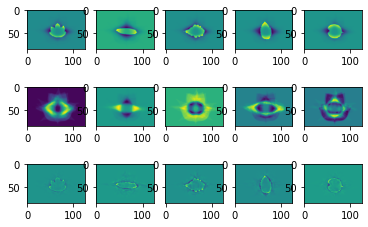

In [0]:
fig, axarr = plt.subplots(3,5) 

for i in range(5):
    axarr[0][i].imshow(image_matrix[i].reshape((85, 125)))

for i in range(5):
    axarr[1][i].imshow(X[i].reshape((85, 125)))

for i in range(5):
    axarr[2][i].imshow(S[i].reshape((85, 125)))
